In [1]:
import matplotlib
import requests
import pandas as pd
import json
import quandl
from pprint import pprint
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

quandl.ApiConfig.api_key = 'x_XCDoMssgvRUBStbiPn'

response_one = quandl.get('CMHC/HPPA50_ON')

In [2]:
response_two = quandl.get('CMHC/HPPA50_ON', start_date='2019-01-01', end_date='2020-09-30')
response_df = pd.DataFrame(response_two, columns = ['Average', 'Units']).reset_index()
response_df

,Date,Average,Units
0,2019-01-31,952417.0,1544.0
1,2019-02-28,969348.0,1370.0
2,2019-03-31,822919.0,1090.0
3,2019-04-30,781375.0,1537.0
4,2019-05-31,940509.0,1808.0
5,2019-06-30,907690.0,1315.0
6,2019-07-31,872848.0,1379.0
7,2019-08-31,874600.0,1243.0
8,2019-09-30,840612.0,1355.0
9,2019-10-31,845374.0,1286.0


In [7]:
# Add colunm 'month'
response_df['month'] = response_df['Date'].dt.strftime('%m')
response_df

,Date,Average,Units,year,month
0,2019-01-31,952417.0,1544.0,19,01
1,2019-02-28,969348.0,1370.0,19,02
2,2019-03-31,822919.0,1090.0,19,03
3,2019-04-30,781375.0,1537.0,19,04
4,2019-05-31,940509.0,1808.0,19,05
5,2019-06-30,907690.0,1315.0,19,06
6,2019-07-31,872848.0,1379.0,19,07
7,2019-08-31,874600.0,1243.0,19,08
8,2019-09-30,840612.0,1355.0,19,09
9,2019-10-31,845374.0,1286.0,19,10


In [8]:
# Add colunms 'year'
response_df['year'] = response_df['Date'].dt.strftime('%y')
response_df


,Date,Average,Units,year,month
0,2019-01-31,952417.0,1544.0,19,01
1,2019-02-28,969348.0,1370.0,19,02
2,2019-03-31,822919.0,1090.0,19,03
3,2019-04-30,781375.0,1537.0,19,04
4,2019-05-31,940509.0,1808.0,19,05
5,2019-06-30,907690.0,1315.0,19,06
6,2019-07-31,872848.0,1379.0,19,07
7,2019-08-31,874600.0,1243.0,19,08
8,2019-09-30,840612.0,1355.0,19,09
9,2019-10-31,845374.0,1286.0,19,10


In [9]:
# Get only 2020 year
df2020 = response_df.loc[response_df['year'] == '20', :] 
df2020

,Date,Average,Units,year,month
12,2020-01-31,844830.0,1144.0,20,01
13,2020-02-29,853468.0,1184.0,20,02
14,2020-03-31,898243.0,943.0,20,03
15,2020-04-30,832860.0,1365.0,20,04
16,2020-05-31,903186.0,1098.0,20,05
17,2020-06-30,978462.0,1317.0,20,06
18,2020-07-31,792402.0,1547.0,20,07
19,2020-08-31,830097.0,1299.0,20,08
20,2020-09-30,855467.0,1579.0,20,09


In [10]:
# Get only 2019 year
df2019 = response_df.loc[response_df['year'] == '19', :]
df2019

,Date,Average,Units,year,month
0,2019-01-31,952417.0,1544.0,19,01
1,2019-02-28,969348.0,1370.0,19,02
2,2019-03-31,822919.0,1090.0,19,03
3,2019-04-30,781375.0,1537.0,19,04
4,2019-05-31,940509.0,1808.0,19,05
5,2019-06-30,907690.0,1315.0,19,06
6,2019-07-31,872848.0,1379.0,19,07
7,2019-08-31,874600.0,1243.0,19,08
8,2019-09-30,840612.0,1355.0,19,09
9,2019-10-31,845374.0,1286.0,19,10


In [11]:
# Get only 9 months of 2019
reduced_df2019 = df2019.loc[(df2019['month'] < '10'), :]
reduced_df2019

,Date,Average,Units,year,month
0,2019-01-31,952417.0,1544.0,19,01
1,2019-02-28,969348.0,1370.0,19,02
2,2019-03-31,822919.0,1090.0,19,03
3,2019-04-30,781375.0,1537.0,19,04
4,2019-05-31,940509.0,1808.0,19,05
5,2019-06-30,907690.0,1315.0,19,06
6,2019-07-31,872848.0,1379.0,19,07
7,2019-08-31,874600.0,1243.0,19,08
8,2019-09-30,840612.0,1355.0,19,09


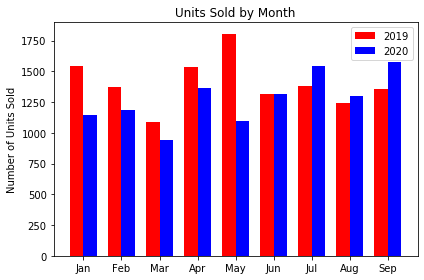

In [12]:
# plot grouped bar chart for "Units sold by Year"

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
x_2019 = reduced_df2019['Units']
x_2020 = df2020['Units']

x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, x_2019, width, label='2019', color='red')
rects2 = ax.bar(x + width/2, x_2020, width, label='2020', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Units Sold')
ax.set_title('Units Sold by Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

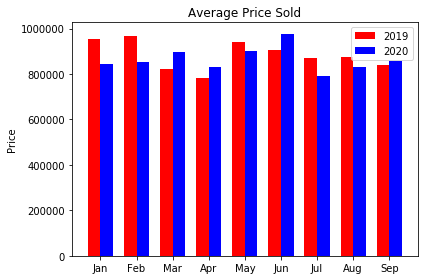

<Figure size 576x288 with 0 Axes>

In [42]:
# Plot grouped bar chart for 'Average Price by Year'

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
x_2019 = reduced_df2019['Average']
x_2020 = df2020['Average']

x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, x_2019, width, label='2019', color='red')
rects2 = ax.bar(x + width/2, x_2020, width, label='2020', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price')
ax.set_title('Average Price Sold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

In [21]:
# Merge dataframes
merged_df = pd.merge(df2020, reduced_df2019, how="left", on='month')

# Rename colums
renamed_merged_df = merged_df.rename(columns={'Date_x': 'Date',
                                            'Average_x':'2020 Avg Price',
                                             'Units_x': '2020 Units Sold',
                                             'Average_y': '2019 Avg Price',
                                             'Units_y': '2019 Units Sold',
                                             'key_date_x':'Month/Year'
                                             })
renamed_merged_df

,Date,2020 Avg Price,2020 Units Sold,year_x,month,Date_y,2019 Avg Price,2019 Units Sold,year_y
0,2020-01-31,844830.0,1144.0,20,01,2019-01-31,952417.0,1544.0,19
1,2020-02-29,853468.0,1184.0,20,02,2019-02-28,969348.0,1370.0,19
2,2020-03-31,898243.0,943.0,20,03,2019-03-31,822919.0,1090.0,19
3,2020-04-30,832860.0,1365.0,20,04,2019-04-30,781375.0,1537.0,19
4,2020-05-31,903186.0,1098.0,20,05,2019-05-31,940509.0,1808.0,19
5,2020-06-30,978462.0,1317.0,20,06,2019-06-30,907690.0,1315.0,19
6,2020-07-31,792402.0,1547.0,20,07,2019-07-31,872848.0,1379.0,19
7,2020-08-31,830097.0,1299.0,20,08,2019-08-31,874600.0,1243.0,19
8,2020-09-30,855467.0,1579.0,20,09,2019-09-30,840612.0,1355.0,19


In [22]:
# Drop unnecessary columns 
df = renamed_merged_df.drop(columns=['month','year_x','Date_y','year_y'])
df

,Date,2020 Avg Price,2020 Units Sold,2019 Avg Price,2019 Units Sold
0,2020-01-31,844830.0,1144.0,952417.0,1544.0
1,2020-02-29,853468.0,1184.0,969348.0,1370.0
2,2020-03-31,898243.0,943.0,822919.0,1090.0
3,2020-04-30,832860.0,1365.0,781375.0,1537.0
4,2020-05-31,903186.0,1098.0,940509.0,1808.0
5,2020-06-30,978462.0,1317.0,907690.0,1315.0
6,2020-07-31,792402.0,1547.0,872848.0,1379.0
7,2020-08-31,830097.0,1299.0,874600.0,1243.0
8,2020-09-30,855467.0,1579.0,840612.0,1355.0


In [33]:
# Check data type
df.dtypes

Date               datetime64[ns]
2020 Avg Price             object
2020 Units Sold           float64
2019 Avg Price             object
2019 Units Sold           float64
dtype: object

In [37]:
#df['2020 Avg Price'] = pd.to_numeric(df['2020 Avg Price'])
#df['2019 Avg Price'] = pd.to_numeric(df['2019 Avg Price'])

In [40]:
#df['2020 Avg Price'] = df['2020 Avg Price'].map("${:.2f}".format)
#df['2019 Avg Price'] = df['2019 Avg Price'].map("${:.2f}".format)


In [ ]:
#https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
#result_pct = result.div(result.sum(1), axis=0)

In [41]:
# Find overal figures
df.describe()

,2020 Units Sold,2019 Units Sold
count,9.000000,9.000000
mean,1275.111111,1404.555556
std,207.314643,205.280973
min,943.000000,1090.000000
25%,1144.000000,1315.000000
50%,1299.000000,1370.000000
75%,1365.000000,1537.000000
max,1579.000000,1808.000000
